<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Quezada García, Vicente Quezada** 

**18-02-2021**

### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

In [ ]:
#Librerías usadas
!pip install biopython
!pip install reportlab
!pip install nglview
!pip install Pandas
!pip install PyDot

In [1]:
#Import de modulos
from Bio.Align.Applications import ClustalwCommandline
import os
import Bio 
from Bio import Entrez
from Bio.Seq import Seq
from Bio import SeqIO
from IPython.core.display import Image
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets 
import warnings
import pickle
import re
import pandas as pd
import csv
import itertools
import numpy as np
from scipy.stats import norm
import importlib
warnings.filterwarnings('ignore') 

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [2]:
%reload_ext autoreload
%autoreload 2
# Escriba aquí su código para el ejercicio 1

import miningscience as msc
print("Descripción de l funcion download_pubmed:")
help(msc.download_pubmed)

print("Descripción de la funcion mining_pubs:")
help(msc.mining_pubs)


Descripción de l funcion download_pubmed:
Help on function download_pubmed in module miningscience:

download_pubmed(keyword: str)
    Docstring download_pubmed, se realiza el minado de las IDs de los artículos
    con  una keyword que se define

Descripción de la funcion mining_pubs:
Help on function mining_pubs in module miningscience:

mining_pubs(tipo: str) -> pandas.core.frame.DataFrame
    Docstring mining_pubs, en este minado se utiliza otros parámetros de busqueda como "DP" "AU" "AD", se
    especifica que devuelve cada parámetro a continuación:
    DP: Devuelve un dataframe con el PMDI y DP_year.
    AU: Devuelve un dataframe con el PMDI y num_auth.
    AD: Devuelve un dataframe con el country y num_auth




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [3]:
# Escriba aquí su código para el ejercicio 2
import Bio
from Bio.Seq import Seq
# cargar biopython o sus módulo, funciones
from Bio import Entrez
import re

# Always tell NCBI who you are (edit the e-mail below!)
#Entrez.email = "gualapuro.moises@gmail.com"
#handle = Entrez.esearch(db="pubmed", 
                        #term="Ecuador proteomics[Title/Abstract]",
                       # usehistory="y")
#record = Entrez.read(handle)
# generate a Python list with all Pubmed IDs of articles about Dengue Network
#id_list = record["IdList"]
#print(record["Count"])
#webenv = record["WebEnv"]
#query_key = record["QueryKey"]
#handle = Entrez.efetch(db="pubmed",
                      # rettype="medline", 
                      # retmode="text", 
                       #retstart=0,
#retmax=543, webenv=webenv, query_key=query_key)

#out_handle = open("data/ECmetagenome_pubs.txt", "w")
#data = handle.read()
#handle.close()
#out_handle.write(data)
#out_handle.close()


# Contribución de los autores
#with open("data/ECmetagenome_pubs.txt") as datafile:
   # a = datafile.readlines(140)
   # print(a)
#Mi codigo:
Informacion= msc.download_pubmed("Ecuador genomics")
Informacion_num=Informacion["Count"]
first_art=Informacion["IdList"][0]
print(f"El número de artículos es:{Informacion_num}")
print(f"El PMID del primer artículo es:{first_art}")

El número de artículos es:193
El PMID del primer artículo es:35121084


In [4]:
import os
os.getcwd()

'C:\\Users\\DELL\\Desktop\\Semestre 6\\Bioinformática\\GBI6_ExamenPython\\data'

## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [5]:
# Escriba aquí su código para el ejercicio 3
print("Dataframe pub_year:")
frame_pub_year = msc.mining_pubs("DP")
print(frame_pub_year.dtypes)
display(frame_pub_year.tail(2))

print("Dataframe pub_authors:")
frame_pub_authors = msc.mining_pubs("AU")
display(frame_pub_authors.head(2))
display(frame_pub_authors.tail(2))

print("Dataframe countries:")
frame_countries = msc.mining_pubs("AD")
display(frame_countries.head(2))
display(frame_countries.tail(2))

Dataframe pub_year:
PMID       object
DP_year     int64
dtype: object


,PMID,DP_year
191,17187350,2007
192,8661097,1996


Dataframe pub_authors:


,PMID,num_auth
0,35121084,12
1,35120121,14


,PMID,num_auth
189,19177531,7
190,19018989,1


Dataframe countries:


,country,num_auth
0,United States,12
1,United States,14


,country,num_auth
190,England,1
191,United States,9


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La Media de publcaciones por año es:
DP_year    2019.0
dtype: float64


Text(10.451526, 51.165691, 'Alemania')

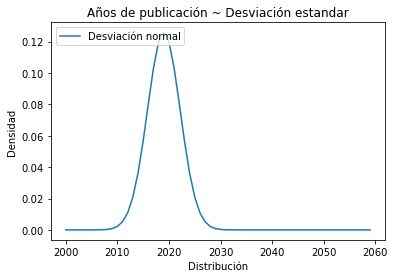

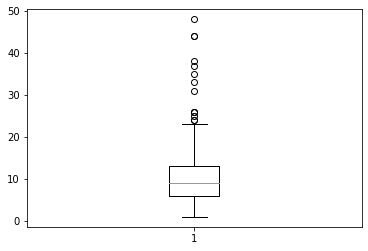

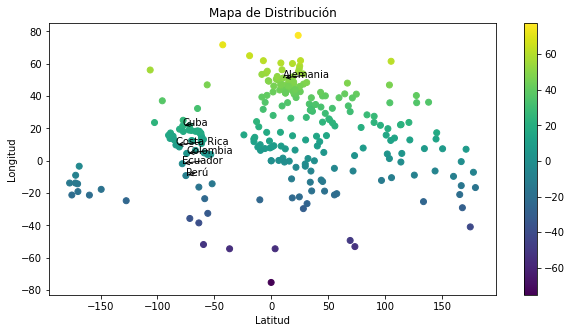

In [27]:
# Escriba aquí su código para el ejercicio 4

#Pubyear
mean_pub_year = frame_pub_year.median(numeric_only=True)
Dstan_pub_year = frame_pub_year.std(numeric_only=True)
print("La Media de publcaciones por año es:")
print(mean_pub_year)
pan= np.arange(2000,2060, 1)

plot1, axi1= plt.subplots()
label="Desviación normal"
axi1.plot(pan,norm.pdf(pan,mean_pub_year, Dstan_pub_year), label=label)
axi1.set_title("Años de publicación ~ Desviación estandar")
axi1.set_xlabel("Distribución")
axi1.set_ylabel("Densidad")
axi1.legend(loc="upper left")

#Pubauthors
frame_pub_authors.drop(frame_pub_authors[frame_pub_authors['num_auth']>50].index,inplace=True)
frame_pub_authors.sort_values(by="num_auth", ascending=False, inplace=True)
plot2, axi2=plt.subplots()
axi2.boxplot(frame_pub_authors["num_auth"])


#Pub_countries
lalo_countries=pd.read_csv('countries.csv', engine='python', skipfooter=3)
lalo_countries['name']=lalo_countries['name'].str.lower()
lalo_countries=lalo_countries.rename(columns={'name': 'country_name'})
frame_countries['country_name'] = frame_countries['country_name'].str.lower()
frame_countries= frame_countries.rename(columns={'country': 'country_name'})
data=pd.concat([frame_countries, lalo_countries]).groupby(['country_name']).sum()
data=data[data['num_auth'].notna()]

plt.figure(figsize=(10,5))
plt.title('Mapa de Distribución')
plt.xlabel('Latitud')
plt.ylabel('Longitud')

plt.scatter(data['longitude'], data['latitude'], c=data['latitude'], marker='o', label='Puntos')
plt.colorbar()

plt.annotate('Ecuador', xy= (data.loc['ecuador']['longitude'], data.loc['ecuador']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('Costa Rica', xy= (data.loc['costa rica']['longitude'], data.loc['costa rica']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('Cuba', xy= (data.loc['cuba']['longitude'], data.loc['cuba']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('Colombia', xy= (data.loc['colombia']['longitude'], data.loc['colombia']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('Perú', xy= (data.loc['peru']['longitude'], data.loc['peru']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('Alemania', xy= (data.loc['germany']['longitude'], data.loc['germany']['latitude']), arrowprops={'arrowstyle': '->'})

## Ejercicio 5 [1 punto]



Interprete los resultados del **ejercicio 4**

Para el gráfico de Años de publicación, se puede mencionar que esta gráfica se comporta como se previó de forma normal, debido a que su pico se encuentra en la media de los datos, como se comprueba con el comando: 

*```print("La Media de publcaciones por año es:")```

*```print(mean_pub_year)```

Esta media ya nos da un dato, que alrededor de 2019 publicaciones se realizan por año en el NCBI.

En cambio para el gráfico de boxplot, representa la cantidad de autores por artículos publicaos, siendo que la caja del boxplot tiene una media de alrededor 9, se puede deducir que ese es el número de autores por artículo, pero a lavez se observa que existen valores outlier o atípicos.

Para el mapa de puntos, se trabajó con paises vecinos y centroamericanos, pudiendose observar que estos paises tienen una seria contribución al número de publicaciones realizadas, aunque se esperaría más ya que el término usado ´para la busqueda y minado involucra a nuestro país, siguen siendo menos de la mitad el aporte que se ha brindado al campo de la genómica con respecto a los demás países.

## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [1]:
# Escriba aquí su código para el ejercicio 6
#Con el archivo .SEQ creo una lista con los 10 primeros genes para Pourouma cecropiifolia 
with open ("sequence.seq", "r") as archivo:
        s1=archivo.read()
        lista=s1.split("\n")[0:10]
print(lista)



['MF775460.1', 'MF775459.1', 'MF775415.1', 'MF775414.1', 'MF775494.1', 'MF775493.1', 'KY941829.1', 'KY941742.1', 'KY941655.1', 'KY941593.1']


In [5]:
#Conectando al Genbank para descargr las secuencias de la lista con los 10 IDs
Entrez.email = "vicente.quezada@est.ikiam.edu.ec"
secuencias = open("./nucelotidos.gb", "w")
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= lista
                  ) as rec: 
    for seq_record in SeqIO.parse(rec, "gb"):
        secuencias.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        secuencias.write(str(seq_record.seq)+'\n')
        secuencias.write('\n')

In [7]:
#Escritura del .FASTA para el ClustelW2
sec_fasta=open("./nucelotidos.fasta","w")
with open("nucelotidos.gb",'r') as genbank: 
    sf=genbank.read()
    for line in sf:
        sec_fasta.write(str(line))

In [8]:
# cargar data multiple y crear alineamientos
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "./nucelotidos.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=./nucelotidos.fasta


In [9]:
# Leer alineamiento
ClustalAlign = AlignIO.read("./nucelotidos.aln", "clustal")
print(ClustalAlign)

# Generar Dendogram (Tree)
from Bio import Phylo
tree = Phylo.read("./nucelotidos.dnd", "newick")
Phylo.draw_ascii(tree)

Alignment with 10 rows and 1000 columns
--------------------------------------------...--- MF775460.1Pourouma
--------------------------------------------...--- MF775459.1Pourouma
--------------------------------------------...--- KY941829.1Pourouma
--------------------------------------------...--- MF775415.1Pourouma
--------------------------------------------...--- MF775414.1Pourouma
--------------------------------------------...--- KY941593.1Pourouma
AGAATCGGGCGCCTTCGGCGTTCGAATTGTAGTCTGAAGAAGCG...CCG MF775494.1Pourouma
AGAATCGGGCGCCTTCGGCGTTCGAATTGTAGTCTGAAGAAGCG...CCG MF775493.1Pourouma
--------------------------------------------...--- KY941742.1Pourouma
--------------------------------------------...--- KY941655.1Pourouma
                                                        , MF775460.1Pourouma
                                                       ,|
       ________________________________________________|| MF775459.1Pourouma
      |                                         

In [11]:
# cargar alineamiento 
with open("./nucelotidos.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

# Inicializar la calculadora de Distancias y del modelo 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

# Matriz de Distancias 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

<class 'Bio.Align.MultipleSeqAlignment'>
MF775460.1Pourouma	0
MF775459.1Pourouma	0.0	0
KY941829.1Pourouma	0.01100000000000001	0.01100000000000001	0
MF775415.1Pourouma	0.21599999999999997	0.21599999999999997	0.21999999999999997	0
MF775414.1Pourouma	0.21599999999999997	0.21599999999999997	0.21999999999999997	0.0	0
KY941593.1Pourouma	0.21699999999999997	0.21699999999999997	0.22099999999999997	0.0030000000000000027	0.0030000000000000027	0
MF775494.1Pourouma	0.862	0.862	0.868	0.856	0.856	0.854	0
MF775493.1Pourouma	0.862	0.862	0.868	0.856	0.856	0.854	0.0	0
KY941742.1Pourouma	0.351	0.351	0.356	0.381	0.381	0.381	0.851	0.851	0
KY941655.1Pourouma	0.28500000000000003	0.28500000000000003	0.29100000000000004	0.28800000000000003	0.28800000000000003	0.29000000000000004	0.881	0.881	0.38	0
	MF775460.1Pourouma	MF775459.1Pourouma	KY941829.1Pourouma	MF775415.1Pourouma	MF775414.1Pourouma	KY941593.1Pourouma	MF775494.1Pourouma	MF775493.1Pourouma	KY941742.1Pourouma	KY941655.1Pourouma


Tree(rooted=True)
    Clade(branch_length=0, name='Inner8')
        Clade(branch_length=0.0030625000000000097, name='Inner7')
            Clade(branch_length=0.0, name='MF775460.1Pourouma')
            Clade(branch_length=0.0, name='MF775459.1Pourouma')
        Clade(branch_length=0.0079375, name='KY941829.1Pourouma')
        Clade(branch_length=0.10131249999999999, name='Inner6')
            Clade(branch_length=0.02641666666666667, name='Inner5')
                Clade(branch_length=0.15362500000000007, name='KY941655.1Pourouma')
                Clade(branch_length=0.051375000000000004, name='Inner2')
                    Clade(branch_length=0.17849999999999994, name='KY941742.1Pourouma')
                    Clade(branch_length=0.6725000000000001, name='Inner1')
                        Clade(branch_length=0.0, name='MF775493.1Pourouma')
                        Clade(branch_length=0.0, name='MF775494.1Pourouma')
            Clade(branch_length=0.11033333333333331, name='Inner4')
        

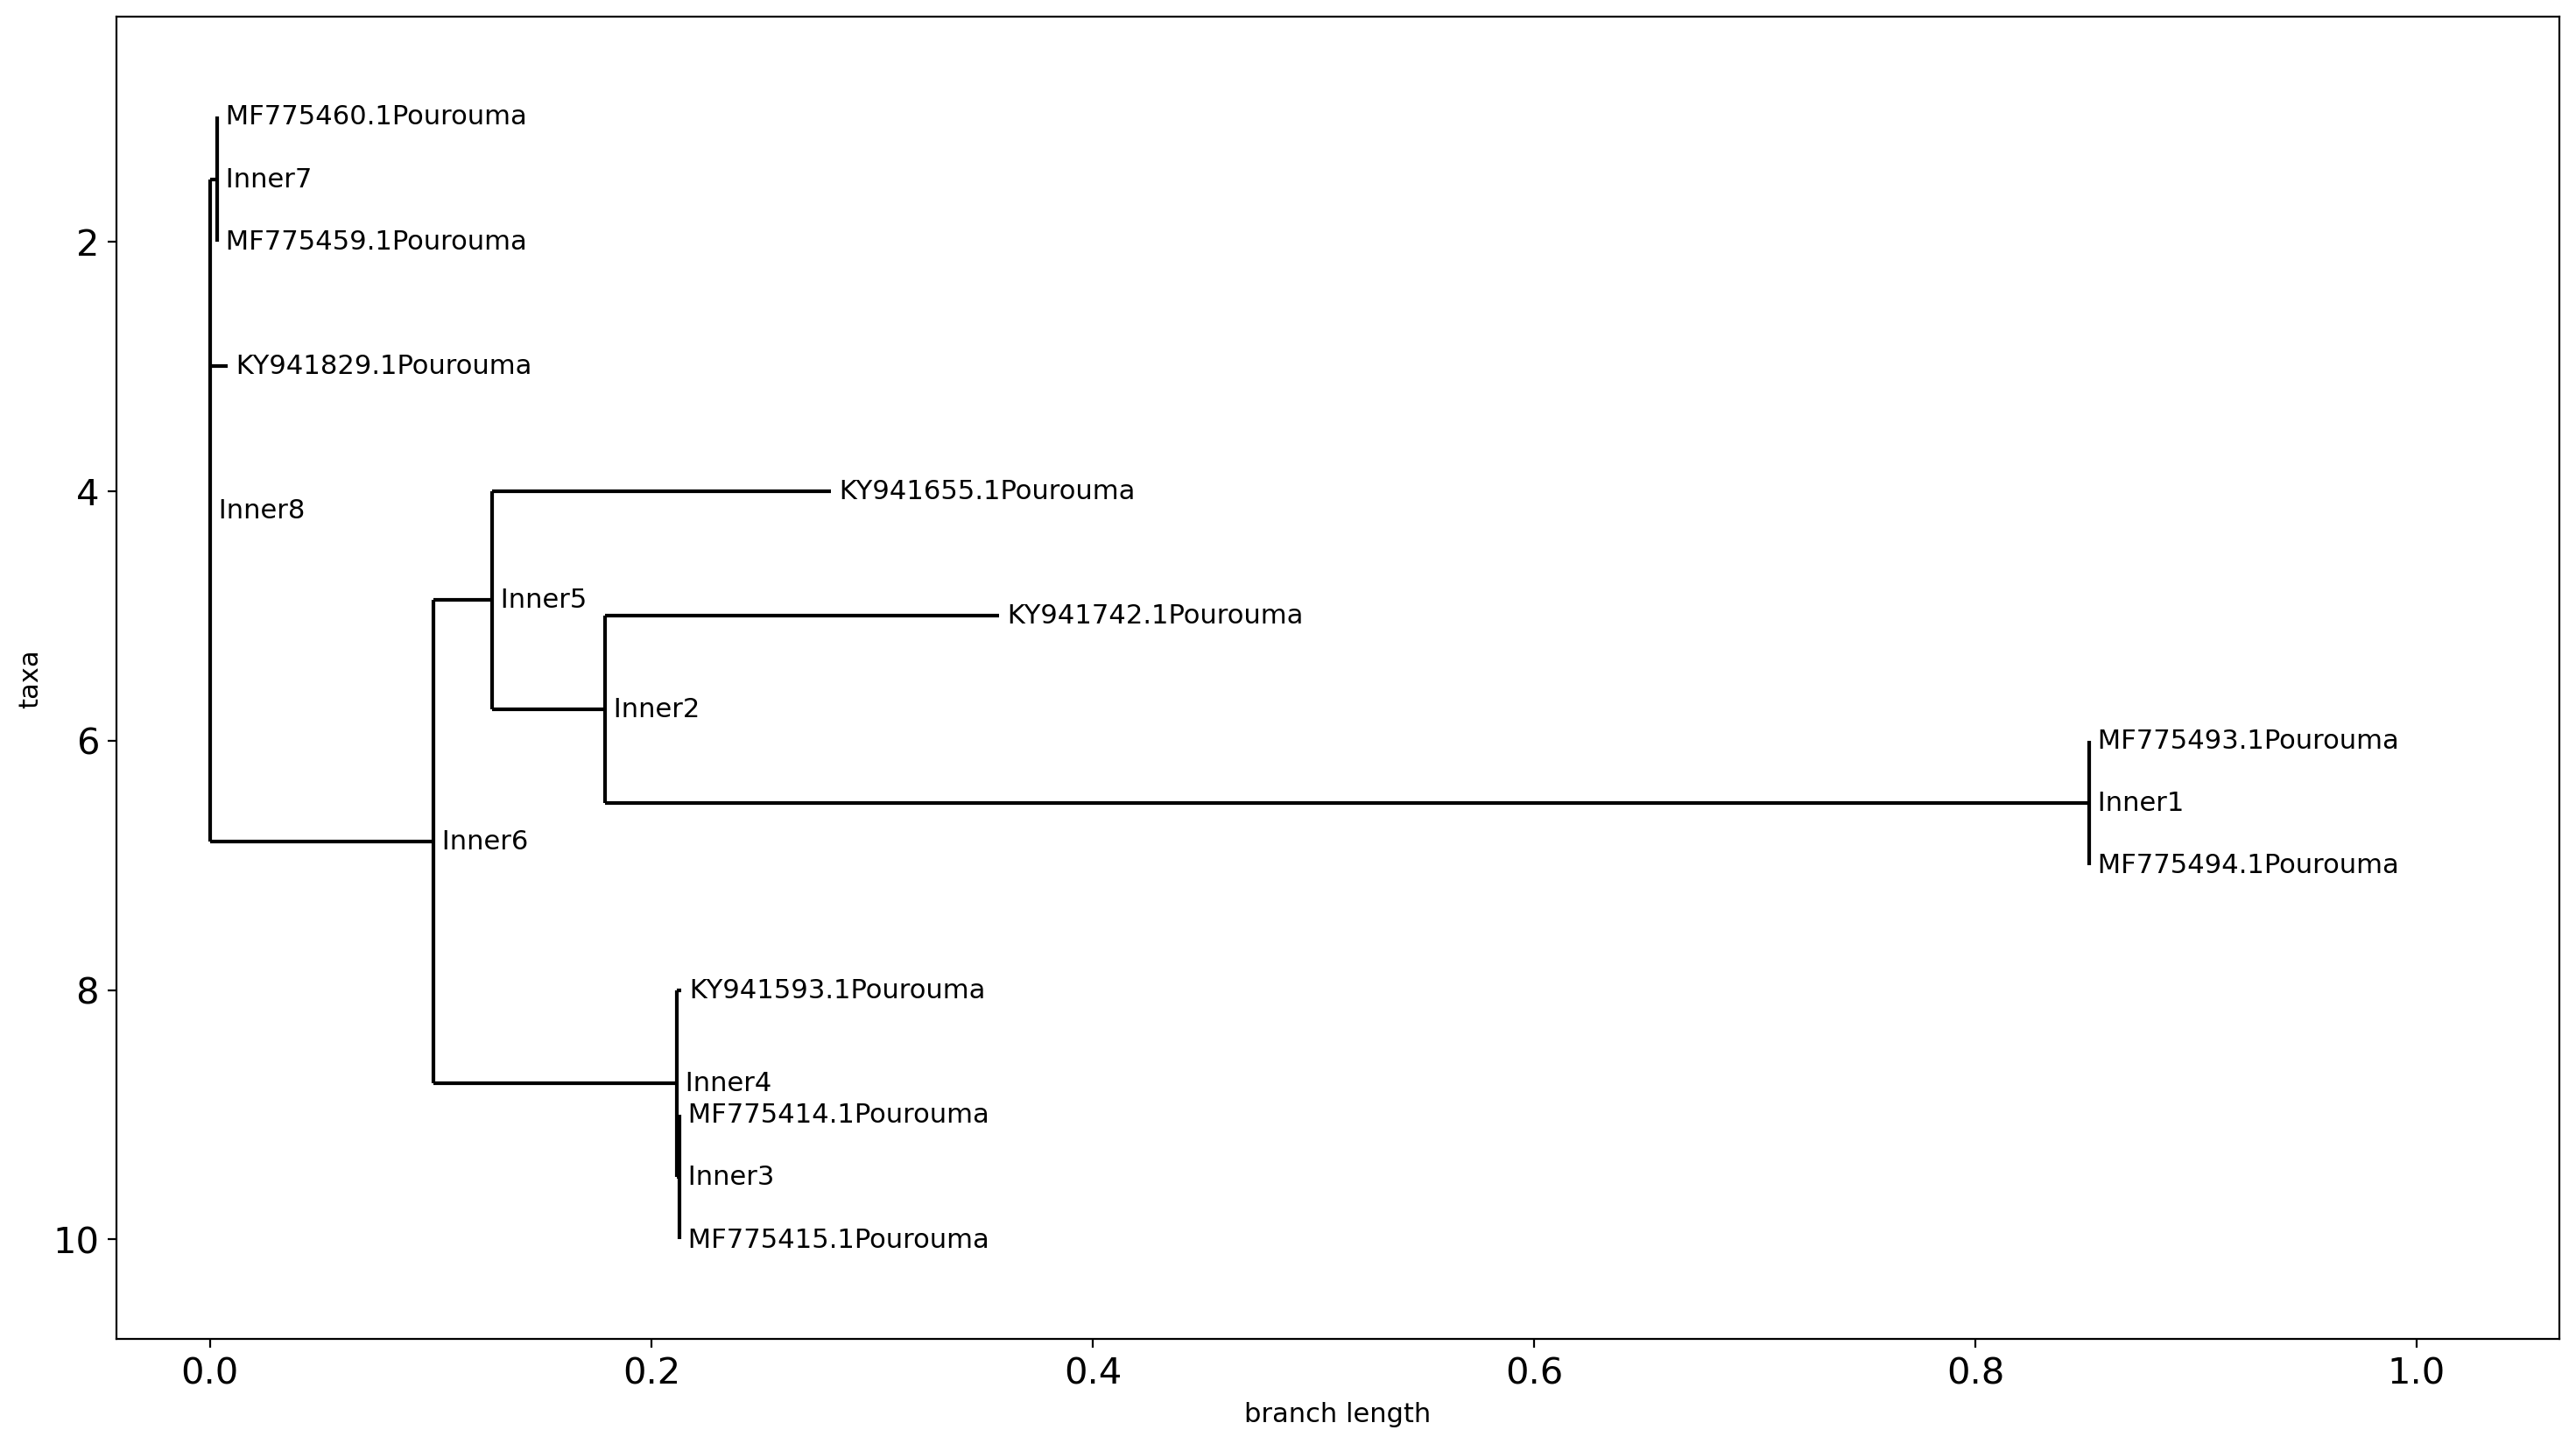

In [13]:
# Inicializar el constructor del arbol ( Tree Constructor )
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

# Construir el arbol 
Pc_tree = constructor.build_tree(alignment)
Pc_tree.rooted = True
print(Pc_tree)

# Guardar el arbol 
Phylo.write(Pc_tree, "./Pc_tree.xml", "phyloxml")

# Arbol para Pourouma cecropiifolia 
T_Pc = Phylo.read(file="./Pc_tree.xml", format= "phyloxml") 

T_Pc = plt.figure(figsize=(18, 10), dpi=200) # create figure & set the size 
matplotlib.rc('font', size=11)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=15)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=15)       # fontsize of the tick labels
axes = T_Pc.add_subplot(1, 1, 1)
Phylo.draw(Pc_tree, axes=axes)
T_Pc.savefig("./Pc_cladogram")

**Escriba aquí la interpretación del árbol**

El árbol generado muestra distintos genes de Pourouma cecropiifolia, es decir estamos evaluando la evolución de sus genes a través de ancestros en común. Como se puede ver a simple vista, muchos de estos genes que se encuentran relacionados directamente, por ejemplo MF775460.1 y MF775490.1, que pueden provenir del mismo gen ancestral, ya que tienen claves de IDs casi identicas y se puede asumir que esa similitud se debe a que ambos genes provienen de la misma zona en el DNA de la planta donde se secuenciaron, por lo cuál es muy probable que se hayan transmitido de manera simultanea a través de la generaciones, de ese mismo modo podríamos decir que los genes con IDs semejantes se encontrarán en los mismos clados y por ende emparentados cercanamente, pero este no es el caso. Podemos destacar que los genes del Inner1 están más emparentados con los genes del Inner2 e Inner5 que con los genes del Inner7. Esto puede significar directamente que estos genes provienen de ancestros diferentes o hubo un evento de mutación de estos genes que divergieron en el tiempo.

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```